In [4]:
# Essential imports for XGBoost model training and evaluation
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load data directly from CSV (no SQL/engine needed)
data = pd.read_csv('final_features.csv')

In [6]:
# Sample 350,000 rows randomly for training/testing
data = data.sample(n=350000, random_state=42).reset_index(drop=True)

In [7]:
read_db = 'train.db'
conn_r = create_connection(read_db)
checkTableExists(conn_r)
conn_r.close()

NameError: name 'Error' is not defined

In [8]:
# try to sample data according to the computing power you have
if os.path.isfile(read_db):
    conn_r = create_connection(read_db)
    if conn_r is not None:
        # for selecting first 1M rows
        # data = pd.read_sql_query("""SELECT * FROM data LIMIT 100001;""", conn_r)

        # for selecting random points
        data = pd.read_sql_query("SELECT * From data ORDER BY RANDOM() LIMIT 350001;", conn_r)
        conn_r.commit()
        conn_r.close()

NameError: name 'os' is not defined

In [9]:
# Extract target and drop unnecessary columns
y = data['is_duplicate']
X = data.drop(['Unnamed: 0', 'id', 'is_duplicate'], axis=1)

In [10]:
data.head()

,Unnamed: 0,id,is_duplicate,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,...,374_y,375_y,376_y,377_y,378_y,379_y,380_y,381_y,382_y,383_y
0,8067,8067,0,0.749981,0.749981,0.999975,0.999975,0.874989,0.874989,0.0,...,-0.054212,-3.028799,1.655325,5.710899,8.756263,-2.251488,-11.054463,4.640561,9.064545,-3.512050
1,368101,368101,0,0.399992,0.399992,0.999975,0.666656,0.666659,0.545450,0.0,...,8.048642,15.083051,18.354549,-8.399447,6.905151,2.281588,-6.266975,-1.196846,11.278670,6.657093
2,70497,70497,0,0.000000,0.000000,0.499988,0.249997,0.249997,0.124999,0.0,...,5.743781,6.436951,4.319531,-1.217919,4.987710,3.314978,-12.235043,8.658722,-1.719855,2.074674
3,226567,226567,1,0.999975,0.999975,0.666644,0.399992,0.857131,0.666659,0.0,...,10.937809,8.670634,-2.797003,1.748601,4.938654,5.408084,-14.187746,9.440034,7.162097,3.503886
4,73186,73186,1,0.749981,0.599988,0.333322,0.249994,0.571420,0.444440,0.0,...,-5.409598,-3.453346,10.385251,4.748159,4.265778,3.172637,-8.647166,-3.322582,1.908034,8.045281


In [11]:
pd.set_option('display.max_columns', None)

# Show ALL rows if you want (but careful with big data)
# pd.set_option('display.max_rows', None)

# Show full column width without cutting off text
pd.set_option('display.max_colwidth', None)

# Now display the first 5 rows fully
print(data.head(5))

   Unnamed: 0      id  is_duplicate   cwc_min   cwc_max   csc_min   csc_max  \
0        8067    8067             0  0.749981  0.749981  0.999975  0.999975   
1      368101  368101             0  0.399992  0.399992  0.999975  0.666656   
2       70497   70497             0  0.000000  0.000000  0.499988  0.249997   
3      226567  226567             1  0.999975  0.999975  0.666644  0.399992   
4       73186   73186             1  0.749981  0.599988  0.333322  0.249994   

    ctc_min   ctc_max  last_word_eq  first_word_eq  abs_len_diff  mean_len  \
0  0.874989  0.874989           0.0            1.0           0.0       8.0   
1  0.666659  0.545450           0.0            1.0           2.0      10.0   
2  0.249997  0.124999           0.0            0.0           8.0      12.0   
3  0.857131  0.666659           0.0            1.0           2.0       8.0   
4  0.571420  0.444440           0.0            1.0           2.0       8.0   

   token_set_ratio  token_sort_ratio  fuzz_ratio  fuzz_p

In [12]:
# Ensure all features are numeric
X = X.apply(pd.to_numeric)

In [13]:
y_true = list(map(int, y_true.values))

NameError: name 'y_true' is not defined

In [16]:
# Split data into train and test sets (stratified)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

In [17]:
print("Number of data points in train data :",X_train.shape)
print("Number of data points in test data :",X_test.shape)

Number of data points in train data : (245000, 794)
Number of data points in test data : (105000, 794)


In [19]:
print("-"*10, "Distribution of output variable in train data", "-"*10)
train_distr = Counter(y_train)
train_len = len(y_train)
print("Class 0: ",int(train_distr[0])/train_len,"Class 1: ", int(train_distr[1])/train_len)
print("-"*10, "Distribution of output variable in train data", "-"*10)
test_distr = Counter(y_test)
test_len = len(y_test)
print("Class 0: ",int(test_distr[0])/test_len, "Class 1: ",int(test_distr[1])/test_len)

---------- Distribution of output variable in train data ----------


NameError: name 'Counter' is not defined

In [17]:
"""It guesses randomly for every question. For each question in your test data, the code flips a coin (metaphorically) to decide if it's a duplicate or not. It assigns a random probability to each outcome.

It checks how bad the random guess was. It then measures how wrong these random guesses were using log_loss and a confusion matrix.

The main idea is to show that any real machine learning model you train should be able to perform much better than this baseline of just randomly guessing."""

"It guesses randomly for every question. For each question in your test data, the code flips a coin (metaphorically) to decide if it's a duplicate or not. It assigns a random probability to each outcome.\n\nIt checks how bad the random guess was. It then measures how wrong these random guesses were using log_loss and a confusion matrix.\n\nThe main idea is to show that any real machine learning model you train should be able to perform much better than this baseline of just randomly guessing."

In [20]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j

    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column

    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1

    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]]
    plt.figure(figsize=(20,4))

    labels = [1,2]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")

    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")

    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")

    plt.show()

Log loss on Test Data using Random Model: 0.8922356907814792
Accuracy on Test Data using Random Model: 0.49393333333333334


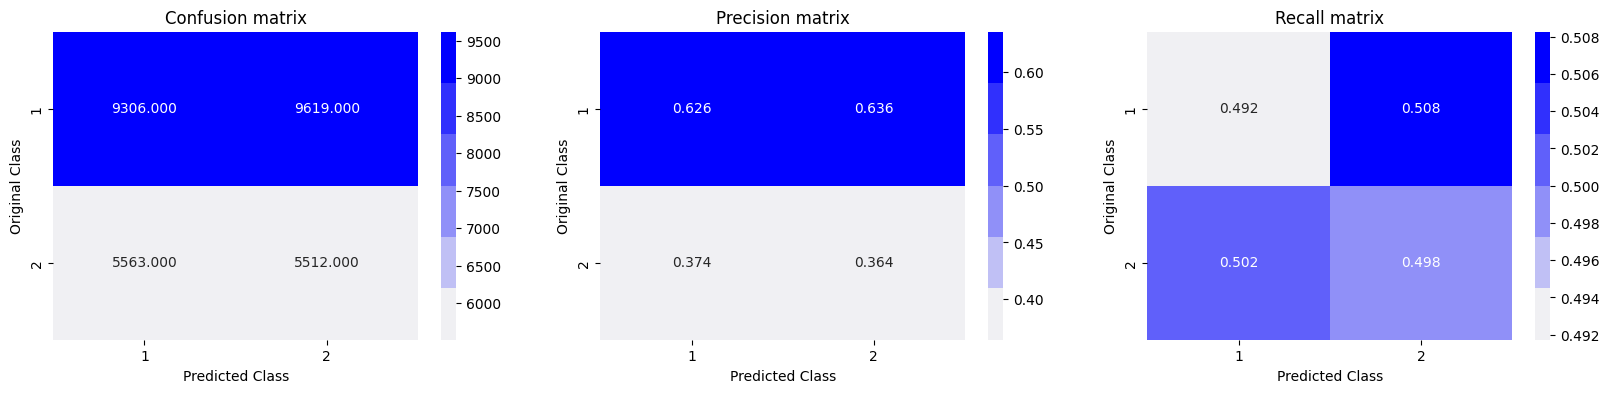

Question 1: What is the capital of France?
Question 2: Which city is the capital of France?
Random Model Prediction: Not Duplicate
Probabilities: Not Duplicate=0.682, Duplicate=0.318


NameError: name 'y_test' is not defined

c:\Users\Aditya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
c:\Users\Aditya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(


For values of alpha =  1e-05 The log loss is: 0.5107725351229678


c:\Users\Aditya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
c:\Users\Aditya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(


For values of alpha =  0.0001 The log loss is: 0.44249779188993227


c:\Users\Aditya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
c:\Users\Aditya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(


For values of alpha =  0.001 The log loss is: 0.4452812670684912


c:\Users\Aditya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
c:\Users\Aditya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(


For values of alpha =  0.01 The log loss is: 0.44557168699727356


c:\Users\Aditya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
c:\Users\Aditya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(


For values of alpha =  0.1 The log loss is: 0.4472478594228647


c:\Users\Aditya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
c:\Users\Aditya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(


For values of alpha =  1 The log loss is: 0.4726573369257598
For values of alpha =  10 The log loss is: 0.5152035336150297


c:\Users\Aditya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
c:\Users\Aditya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(


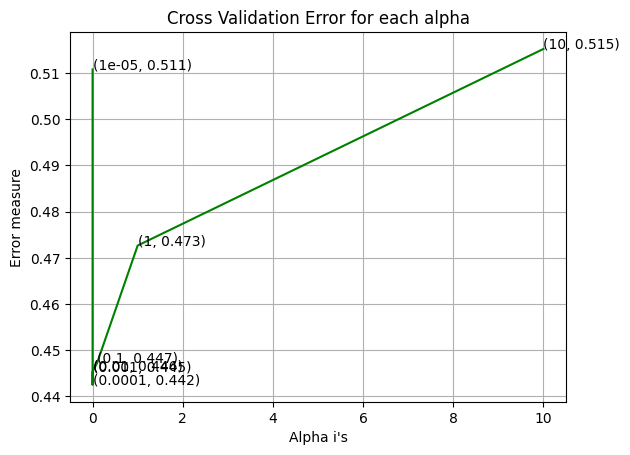

c:\Users\Aditya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(


For values of best alpha =  0.0001 The train log loss is: 0.4334787920871114


c:\Users\Aditya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(


For values of best alpha =  0.0001 The test log loss is: 0.44249779188993227
Total number of data points : 30000


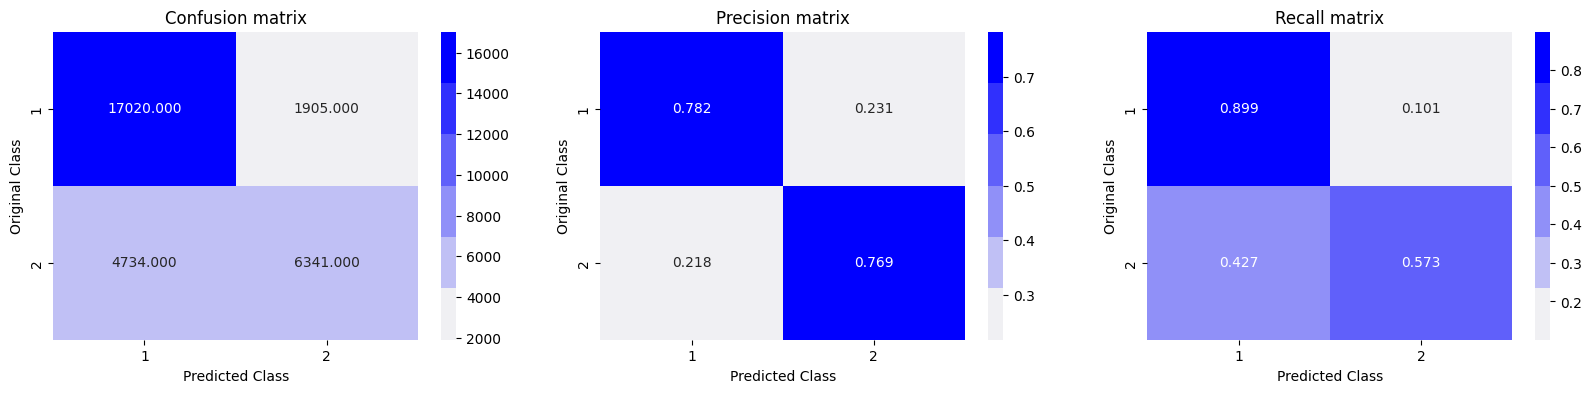

c:\Users\Aditya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:976: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan]
  warnings.warn(


Best alpha from GridSearchCV: 1e-05
Best (negative) log loss: nan


c:\Users\Aditya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(


Train log loss: 0.659008881653579


c:\Users\Aditya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(
C:\Users\Aditya\AppData\Local\Temp\ipykernel_7256\2390801568.py:22: RuntimeWarning: invalid value encountered in divide
  B =(C/C.sum(axis=0))


Test log loss: 0.659008881653579
Train accuracy: 0.6299
Test accuracy: 0.6299


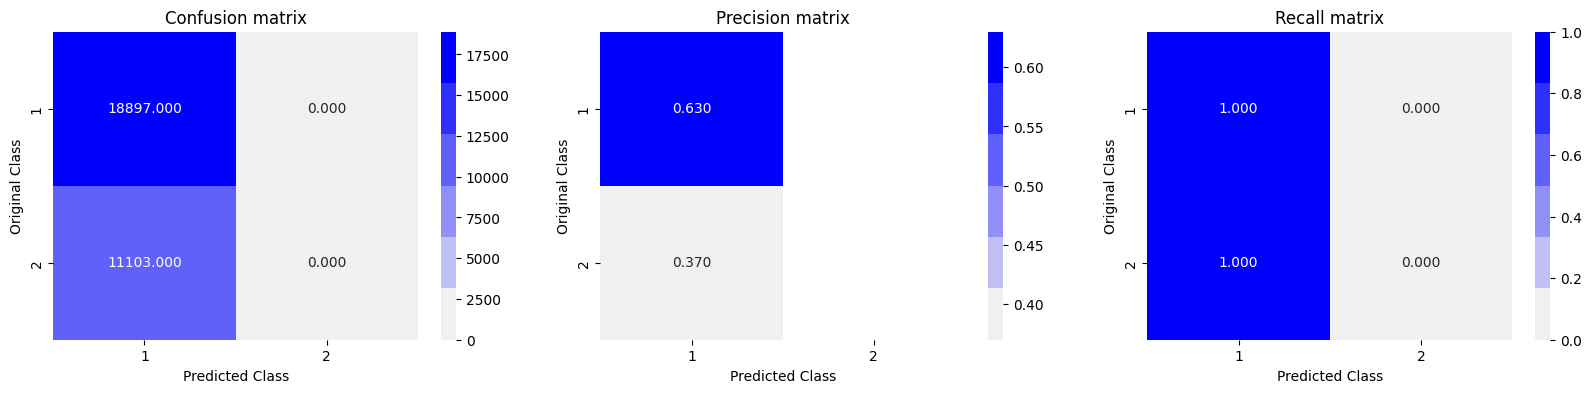

c:\Users\Aditya\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-logloss:0.65077	valid-logloss:0.65082
[10]	train-logloss:0.58807	valid-logloss:0.58849
[10]	train-logloss:0.58807	valid-logloss:0.58849
[20]	train-logloss:0.54246	valid-logloss:0.54314
[20]	train-logloss:0.54246	valid-logloss:0.54314
[30]	train-logloss:0.50866	valid-logloss:0.50962
[30]	train-logloss:0.50866	valid-logloss:0.50962
[40]	train-logloss:0.48315	valid-logloss:0.48432
[40]	train-logloss:0.48315	valid-logloss:0.48432
[50]	train-logloss:0.46289	valid-logloss:0.46429
[50]	train-logloss:0.46289	valid-logloss:0.46429
[60]	train-logloss:0.44672	valid-logloss:0.44833
[60]	train-logloss:0.44672	valid-logloss:0.44833
[70]	train-logloss:0.43387	valid-logloss:0.43569
[70]	train-logloss:0.43387	valid-logloss:0.43569
[80]	train-logloss:0.42348	valid-logloss:0.42541
[80]	train-logloss:0.42348	valid-logloss:0.42541
[90]	train-logloss:0.41470	valid-logloss:0.41680
[90]	train-logloss:0.41470	valid-logloss:0.41680
[100]	train-logloss:0.40743	valid-logloss:0.40966
[100]	train-logloss:

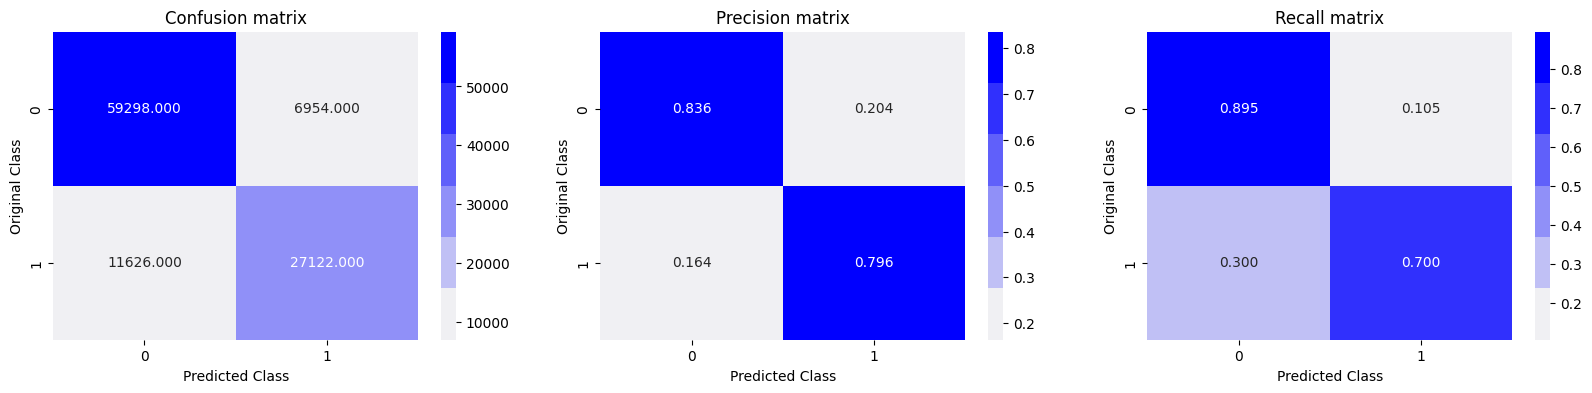

XGBoost model saved as xgb_model_350k.json


In [21]:
# XGBoost Model Training and Evaluation (350,000 Data Points)
d_train = xgb.DMatrix(X_train, label=y_train)
d_test = xgb.DMatrix(X_test, label=y_test)

params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'eta': 0.02,
    'max_depth': 4,
    'seed': 42
}

watchlist = [(d_train, 'train'), (d_test, 'valid')]
bst = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=20, verbose_eval=10)

# Predict probabilities and classes
predict_y = bst.predict(d_test)
predicted_y = (predict_y > 0.5).astype(int)

# Log loss and accuracy
test_logloss = log_loss(y_test, predict_y)
test_accuracy = accuracy_score(y_test, predicted_y)
print(f"Test Log Loss: {test_logloss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Confusion matrix and visualization
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    A = (((C.T)/(C.sum(axis=1))).T)
    B = (C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    labels = [0,1]
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    plt.subplot(1, 3, 3)
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    plt.show()

plot_confusion_matrix(y_test, predicted_y)

# Save the trained model for deployment
bst.save_model('xgb_model_350k.json')
print('XGBoost model saved as xgb_model_350k.json')

# Summary and Next Steps
- This notebook is now fully independent for XGBoost model training on 350,000 data points.
- It loads data, preprocesses, trains, evaluates, and saves the model for deployment.
- Use the saved model (`xgb_model_350k.json`) in your web application backend for duplicate question detection.

## Next Steps: Model Deployment
- The trained XGBoost model (`xgb_model_350k.json`) is now saved and ready for use in your web application.
- You can load this model in your Flask backend to serve predictions for duplicate question detection.

# XGBoost Model Training and Evaluation (350,000+ Data Points)
This section trains an XGBoost model on 350,000+ data points, evaluates its performance, and saves the trained model for deployment in the web application.

In [22]:
import pandas as pd

df = pd.read_csv('final_features.csv')
print(df.columns.tolist())

['Unnamed: 0', 'id', 'is_duplicate', 'cwc_min', 'cwc_max', 'csc_min', 'csc_max', 'ctc_min', 'ctc_max', 'last_word_eq', 'first_word_eq', 'abs_len_diff', 'mean_len', 'token_set_ratio', 'token_sort_ratio', 'fuzz_ratio', 'fuzz_partial_ratio', 'longest_substr_ratio', 'freq_qid1', 'freq_qid2', 'q1len', 'q2len', 'q1_n_words', 'q2_n_words', 'word_Common', 'word_Total', 'word_share', 'freq_q1+q2', 'freq_q1-q2', '0_x', '1_x', '2_x', '3_x', '4_x', '5_x', '6_x', '7_x', '8_x', '9_x', '10_x', '11_x', '12_x', '13_x', '14_x', '15_x', '16_x', '17_x', '18_x', '19_x', '20_x', '21_x', '22_x', '23_x', '24_x', '25_x', '26_x', '27_x', '28_x', '29_x', '30_x', '31_x', '32_x', '33_x', '34_x', '35_x', '36_x', '37_x', '38_x', '39_x', '40_x', '41_x', '42_x', '43_x', '44_x', '45_x', '46_x', '47_x', '48_x', '49_x', '50_x', '51_x', '52_x', '53_x', '54_x', '55_x', '56_x', '57_x', '58_x', '59_x', '60_x', '61_x', '62_x', '63_x', '64_x', '65_x', '66_x', '67_x', '68_x', '69_x', '70_x', '71_x', '72_x', '73_x', '74_x', '75_